### **Customer Satisfaction Project — Notebook 1: Data Cleaning & Exploratory Data Analysis (EDA)**

**Author:** Deepika Priya K

**Notebook Goals**

- Load and inspect raw customer support tickets

- Clean missing values and fix data issues

- Convert date/time into response & resolution durations

- Create binary satisfaction target

- Perform Exploratory Data Analysis (EDA)

- Save cleaned dataset for NLP and ML notebooks

**Main Objective:**

Understand support patterns and create a clean, analysis-ready dataset.

In [ ]:
# 1. Import basic libraries
import pandas as pd
import numpy as np

# 2. Set display options
pd.set_option('display.max_columns',100)
pd.set_option('display.width',120)

# 3. Load the dataset
file_path = 'customer_support_tickets.csv'
df = pd.read_csv(file_path)

In [ ]:
# 4. Look at basic info
print("Shape of data (rows, columns):", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape of data (rows, columns): (8469, 17)

First 5 rows:


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
print("Data types and non-null counts:\n")
print(df.info())

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority              

In [ ]:
# Clean column names for consistency (strip spaces, lowercase, replace spaces with underscores)
df.columns = (df.columns.str.strip()                # remove leading/trailing spaces
                        .str.lower()                # convert to lowercase
                        .str.replace(' ','_')       # replace spaces with _
                        )
# Show the cleaned column names
df.columns

Index(['ticket_id', 'customer_name', 'customer_email', 'customer_age', 'customer_gender', 'product_purchased',
       'date_of_purchase', 'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status', 'resolution',
       'ticket_priority', 'ticket_channel', 'first_response_time', 'time_to_resolution',
       'customer_satisfaction_rating'],
      dtype='object')

**Initial Data Overview :**

- The dataset contains **8469** rows and **17** columns.

- Key columns include Customer Satisfaction Rating, ticket subject, ticket description, ticket priority, ticket channel, and time-related fields.

- There are text fields for ticket subject/description and several categorical fields such as ticket type, channel, and priority.

- This confirms the dataset is suitable for building an ML model combining text + structured features.

### **Check missing values and basic stats**

In [ ]:
# 1. Check missing values in each column
missing = df.isna().sum().sort_values(ascending = False)
print("Missing values per column:\n")
print(missing)

Missing values per column:

customer_satisfaction_rating    5700
resolution                      5700
time_to_resolution              5700
first_response_time             2819
ticket_id                          0
customer_name                      0
customer_email                     0
customer_age                       0
customer_gender                    0
ticket_subject                     0
ticket_type                        0
date_of_purchase                   0
product_purchased                  0
ticket_priority                    0
ticket_status                      0
ticket_description                 0
ticket_channel                     0
dtype: int64


In [ ]:
# 2. Basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
df.describe()


Basic statistics for numeric columns:


,ticket_id,customer_age,customer_satisfaction_rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


**Missing Values and Basic Stats :**

- Four columns have missing values: **customer_satisfaction_rating, resolution, time_to_resolution, and first_response_time**.

- Missing values in **customer_satisfaction_rating** are important because this is our target, so we cannot use rows where this value is missing.

### **Create the target column (Satisfied / Unsatisfied)**

In [ ]:
# 1. Check unique values in satisfaction rating
print("Unique values in Customer Satisfaction Rating:")
print(df.customer_satisfaction_rating.unique())

Unique values in Customer Satisfaction Rating:
[nan  3.  1.  4.  5.  2.]


In [ ]:
# 2. Create binary target: Unsatisfied (0) for 1-3, Satisfied (1) for 4-5
def map_satisfaction(rating):
  if pd.isna(rating):
    return np.nan
  if rating in [1,2,3]:
    return 0                 # Unsatisfied / High risk
  elif rating in [4,5]:
    return 1                 # Satisfied / Low risk
  else:
    return np.nan

df['satisfaction_binary'] = df.customer_satisfaction_rating.apply(map_satisfaction)

In [ ]:
# 3. Check distribution of the new target
print("\nValue counts for satisfaction_binary:")
print(df.satisfaction_binary.value_counts(dropna = False))

# 4. Percentage distribution
print("\nPercentage distribution:")
print(df.satisfaction_binary.value_counts(normalize = True,dropna = False) * 100)


Value counts for satisfaction_binary:
satisfaction_binary
NaN    5700
0.0    1682
1.0    1087
Name: count, dtype: int64

Percentage distribution:
satisfaction_binary
NaN    67.304286
0.0    19.860668
1.0    12.835045
Name: proportion, dtype: float64


**Target Variable Creation :**

Customer Satisfaction Rating (1–5) is converted into a binary target :

- **0 = Unsatisfied** (ratings 1, 2, 3)

- **1 = Satisfied** (ratings 4, 5)

Target distribution :

- **19.86% Unsatisfied**

- **12.83% Satisfied**

- **67% Missing** (no rating provided)

- The dataset is **highly imbalanced** (Unsatisfied > Satisfied).

Only rows with a rating (~2800 rows) will be used for training the ML model.

### **Convert Date & Time Columns**

In [ ]:
# Convert date and time columns to proper datetime format
df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'], errors='coerce', dayfirst=True)
df['first_response_time'] = pd.to_datetime(df['first_response_time'], errors='coerce')
df['time_to_resolution'] = pd.to_datetime(df['time_to_resolution'], errors='coerce')

# Check if the conversion worked
df[['date_of_purchase','first_response_time','time_to_resolution']].dtypes

/tmp/ipython-input-1740651581.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'], errors='coerce', dayfirst=True)


,0
date_of_purchase,datetime64[ns]
first_response_time,datetime64[ns]
time_to_resolution,datetime64[ns]


### **Create clean time-duration features**

In [ ]:
# Create time duration features (in minutes)

# 1. First response time duration
df['first_response_minutes'] = ((df['first_response_time'] - df['date_of_purchase']) / pd.Timedelta(minutes=1))
df['resolution_minutes'] = ((df['time_to_resolution'] - df['date_of_purchase']) / pd.Timedelta(minutes=1))

# Quick check
df[['first_response_minutes','resolution_minutes']].head()

,first_response_minutes,resolution_minutes
0,1.154176e+06,NaN
1,1.066606e+06,NaN
2,1.515555e+06,1.515966e+06
3,1.339650e+06,1.339318e+06
4,1.746733e+06,1.747914e+06


### **Handling Missing Values**

In [ ]:
# Filter dataset only where target (satisfaction_binary) is available
df_model = df[df['satisfaction_binary'].notna()].copy()

# Check shape after filtering
df_model.shape

(2769, 20)

**INSIGHT :**

- Only rows with a satisfaction rating are kept for analysis and modeling.
- Around 5700 rows did not contain a rating and were removed.

In [ ]:
# Check missing values before cleaning
df.isna().sum().sort_values(ascending=False).head(10)

,0
time_to_resolution,5700
resolution_minutes,5700
satisfaction_binary,5700
resolution,5700
customer_satisfaction_rating,5700
first_response_time,2819
first_response_minutes,2819
ticket_id,0
customer_age,0
customer_email,0


In [ ]:
# Fill remaining missing numeric time fields using median
fill_cols = ['first_response_minutes','first_response_time',
             'resolution_minutes','time_to_resolution']

df_model[fill_cols] = df_model[fill_cols].fillna(df_model[fill_cols].median())

In [ ]:
# Check missing values after cleaning
df_model.isna().sum().sort_values(ascending=False).head(10)

,0
ticket_id,0
customer_name,0
customer_email,0
customer_age,0
customer_gender,0
product_purchased,0
date_of_purchase,0
ticket_type,0
ticket_subject,0
ticket_description,0


In [ ]:
# Convert satisfaction_binary from float to int
df_model['satisfaction_binary'] = df_model['satisfaction_binary'].astype(int)

# Confirm the dtype
df_model['satisfaction_binary'].dtype

dtype('int64')

### **Exploratory Data Analysis**

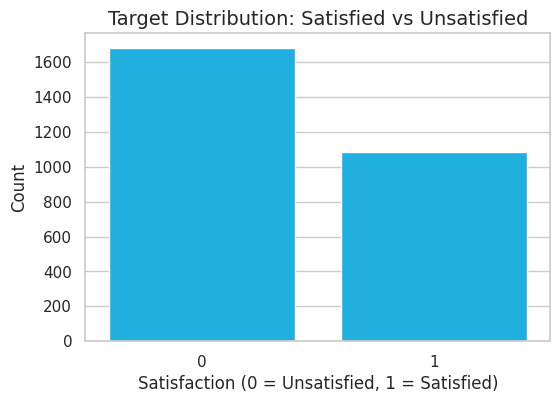

In [ ]:
# Count plot for the target variable (satisfaction_binary)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df_model,x='satisfaction_binary',color='deepskyblue')
plt.title('Target Distribution: Satisfied vs Unsatisfied',fontsize=14)
plt.xlabel('Satisfaction (0 = Unsatisfied, 1 = Satisfied)',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [ ]:
# Print exact counts and percentages
counts = df_model['satisfaction_binary'].value_counts()
percentages = (df_model['satisfaction_binary'].value_counts(normalize=True) * 100)

print('Counts :',counts)
print('\nPercentages :',percentages)

Counts : satisfaction_binary
0    1682
1    1087
Name: count, dtype: int64

Percentages : satisfaction_binary
0    60.743951
1    39.256049
Name: proportion, dtype: float64


**INSIGHT :**

Target Distribution Observation:

- Around 60% of tickets are unsatisfied.

- Around 40% are satisfied.

- The classes are imbalanced, which may affect model performance.

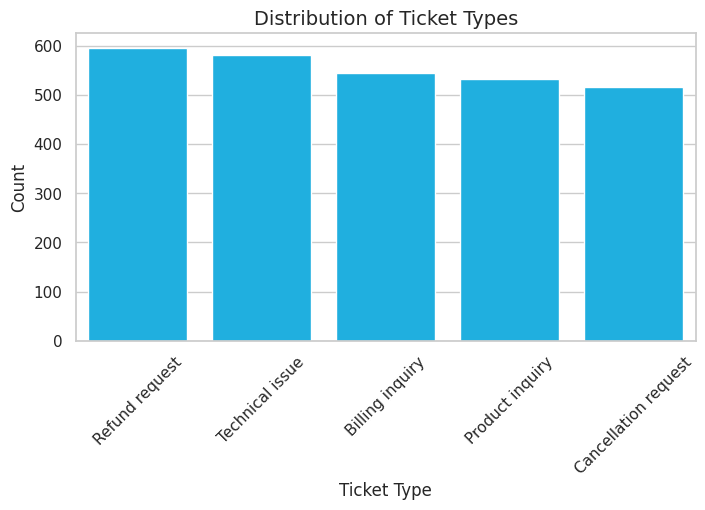

In [ ]:
# Distribution of ticket types
plt.figure(figsize=(8,4))
sns.countplot(data=df_model,x='ticket_type',order=df_model['ticket_type'].value_counts().index,color='deepskyblue')
plt.title('Distribution of Ticket Types',fontsize=14)
plt.xlabel('Ticket Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.show()

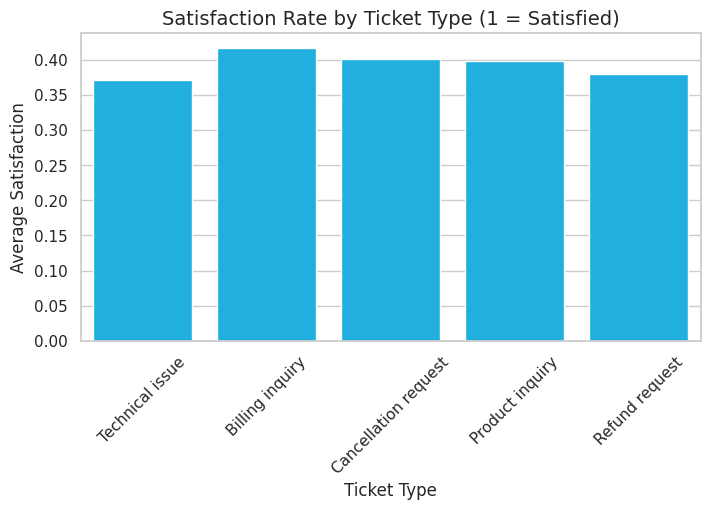

In [ ]:
# Satisfaction rate per ticket type
plt.figure(figsize=(8,4))
sns.barplot(data=df_model,x='ticket_type',y='satisfaction_binary',errorbar=None,color='deepskyblue')
plt.title("Satisfaction Rate by Ticket Type (1 = Satisfied)",fontsize=14)
plt.xlabel("Ticket Type",fontsize=12)
plt.ylabel("Average Satisfaction",fontsize=12)
plt.xticks(rotation=45)
plt.show()

**INSIGHT :**

Distribution:

- All ticket types appear in similar volume; no strong imbalance.

Satisfaction:

- **Technical issues** and **refund requests** have the **lowest satisfaction**.

- **Billing-related tickets** show the **highest satisfaction**.

- Ticket type is an **important predictor** for the model.

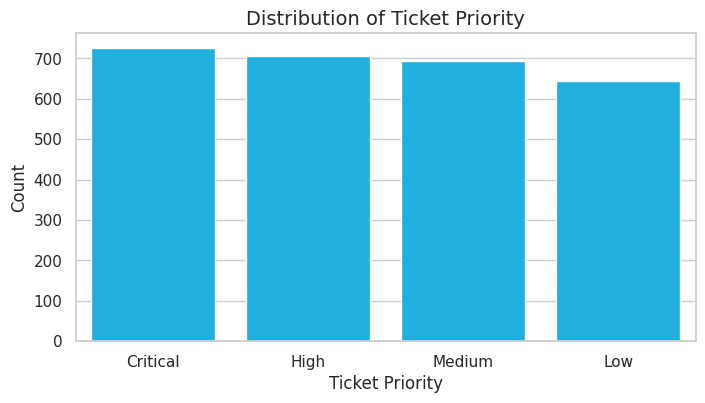

In [ ]:
# Distribution of ticket priority
plt.figure(figsize=(8,4))
sns.countplot(data=df_model,x='ticket_priority',order=df_model['ticket_priority'].value_counts().index,color='deepskyblue')
plt.title('Distribution of Ticket Priority',fontsize=14)
plt.xlabel('Ticket Priority',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

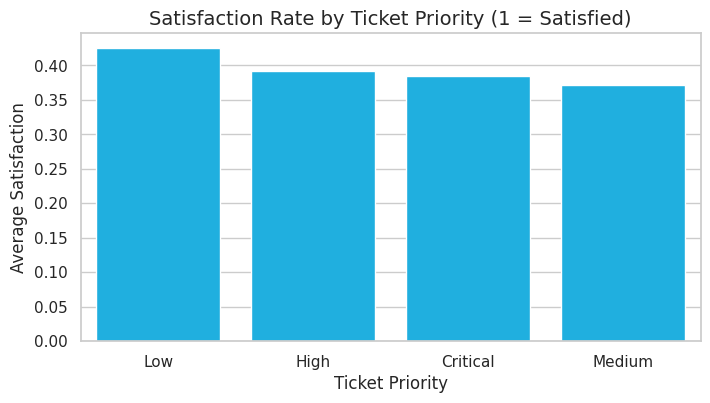

In [ ]:
# Satisfaction rate per ticket priority
plt.figure(figsize=(8,4))
sns.barplot(data=df_model,x='ticket_priority',y='satisfaction_binary',errorbar=None,color='deepskyblue')
plt.title("Satisfaction Rate by Ticket Priority (1 = Satisfied)",fontsize=14)
plt.xlabel("Ticket Priority",fontsize=12)
plt.ylabel("Average Satisfaction",fontsize=12)
plt.show()

**INSIGHT :**

Distribution:

- Critical, High, Medium, and Low priorities are fairly evenly distributed.

Satisfaction:

- **Low-priority** tickets have the **highest satisfaction**.

- **Critical and Medium** priorities show lower satisfaction.

- Higher priority often means **more complex cases**, which reduces satisfaction.


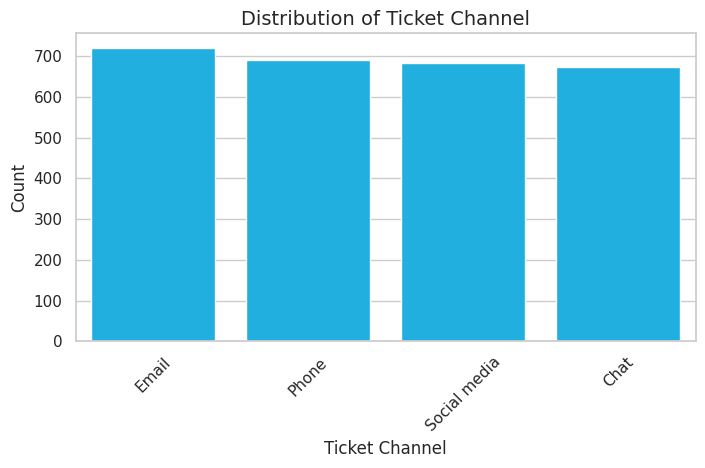

In [ ]:
# Distribution of ticket channel
plt.figure(figsize=(8,4))
sns.countplot(data=df_model,x='ticket_channel',order=df_model['ticket_channel'].value_counts().index,color='deepskyblue')
plt.title('Distribution of Ticket Channel',fontsize=14)
plt.xlabel('Ticket Channel',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.show()

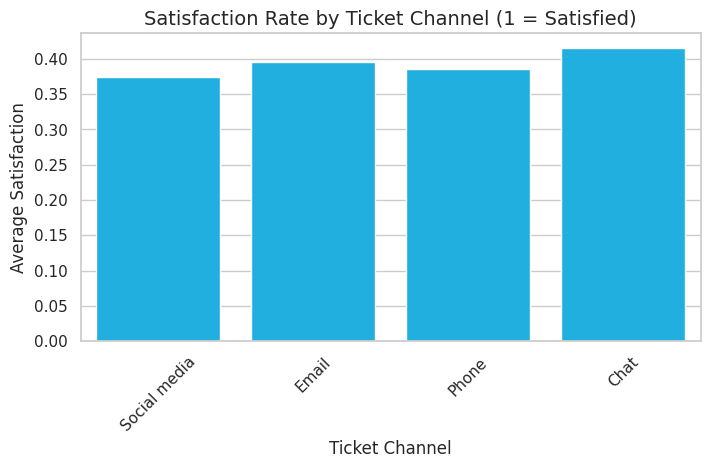

In [ ]:
# Satisfaction rate per ticket channel
plt.figure(figsize=(8,4))
sns.barplot(data=df_model,x='ticket_channel',y='satisfaction_binary',errorbar=None,color='deepskyblue')
plt.title("Satisfaction Rate by Ticket Channel (1 = Satisfied)",fontsize=14)
plt.xlabel("Ticket Channel",fontsize=12)
plt.ylabel("Average Satisfaction",fontsize=12)
plt.xticks(rotation=45)
plt.show()

**INSIGHT :**

Distribution:

- Email, phone, social media, and chat volumes are almost equal.

Satisfaction:

- **Chat** has the highest satisfaction.

- **Social media** has the lowest satisfaction.

- Faster/direct channels (chat, email) offer better customer experience.


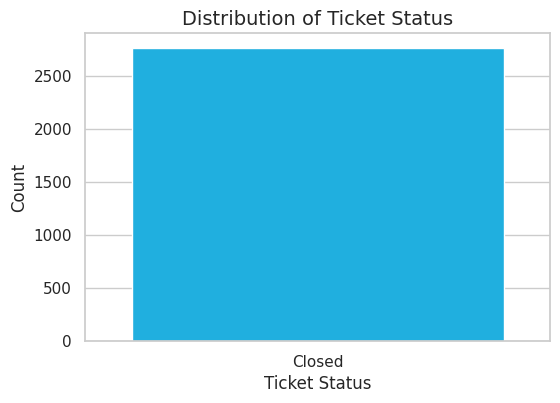

In [ ]:
# Distribution of ticket status
plt.figure(figsize=(6,4))
sns.countplot(data=df_model, x='ticket_status',order=df_model['ticket_status'].value_counts().index,color='deepskyblue')
plt.title("Distribution of Ticket Status", fontsize=14)
plt.xlabel("Ticket Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [ ]:
# This feature has no variation and will not help in analysis or modeling.
df_model = df_model.drop(columns=['ticket_status'])

**INSIGHT :**

- Ticket status has no variation (only “**Closed**”).

- It does not add value for EDA or ML.

- Dropping this column is correct.


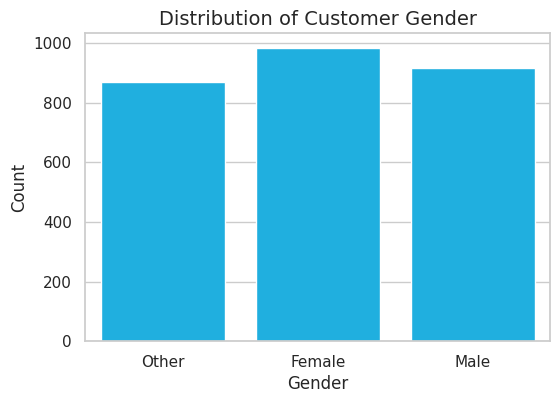

In [ ]:
# Customer Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_model, x='customer_gender', color='deepskyblue')
plt.title("Distribution of Customer Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

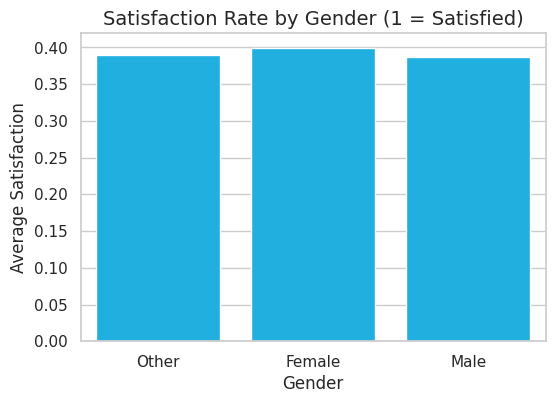

In [ ]:
# Satisfaction Rate by Gender
plt.figure(figsize=(6,4))
sns.barplot(data=df_model, x='customer_gender', y='satisfaction_binary',errorbar=None, color='deepskyblue')
plt.title("Satisfaction Rate by Gender (1 = Satisfied)", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Satisfaction", fontsize=12)
plt.show()

**INSIGHT :**

Distribution:

- Male, Female, and Other appear in similar proportions.

Satisfaction:

- Very small differences between groups.

- Gender is **not a strong driver** of satisfaction.

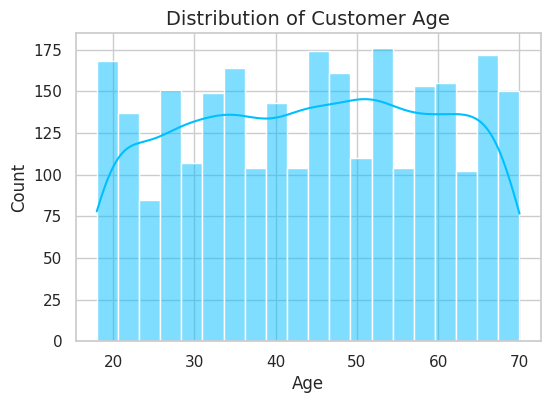

In [ ]:
# Distribution of customer age
plt.figure(figsize=(6,4))
sns.histplot(df_model['customer_age'],bins=20,kde=True,color='deepskyblue')
plt.title("Distribution of Customer Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

**Insight :**

- Customer ages are well distributed between 20–70 without strong skew.

In [ ]:
# Create age groups
df_model['age_group'] = pd.cut(df_model['customer_age'],bins=[0,25,40,60,80],labels=['<25','25-40','40-60','60+'])

df_model[['customer_age','age_group']].head()

,customer_age,age_group
2,48,40-60
3,27,25-40
4,67,60+
10,48,40-60
11,51,40-60


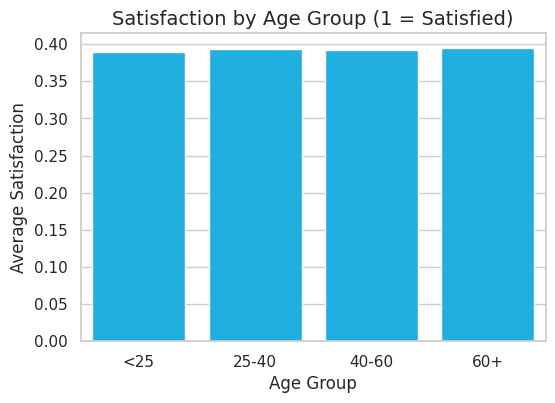

In [ ]:
# Barplot: satisfaction vs age group
plt.figure(figsize=(6,4))
sns.barplot(data=df_model, x='age_group', y='satisfaction_binary', color='deepskyblue', errorbar=None)
plt.title("Satisfaction by Age Group (1 = Satisfied)", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Satisfaction", fontsize=12)
plt.show()

**Insight :**

Distribution:

- Ages 18–70 are well spread without major skew.

Satisfaction:

- All age groups show **similar satisfaction levels**.

- Age has **weak predictive power**.

In [ ]:
# Top 10 most purchased products
top_products = df_model['product_purchased'].value_counts().head(10).index
top_products

Index(['Canon EOS', 'iPhone', 'Canon DSLR Camera', 'GoPro Hero', 'Microsoft Office', 'Sony Xperia', 'Sony 4K HDR TV',
       'Apple AirPods', 'Nest Thermostat', 'LG OLED'],
      dtype='object', name='product_purchased')

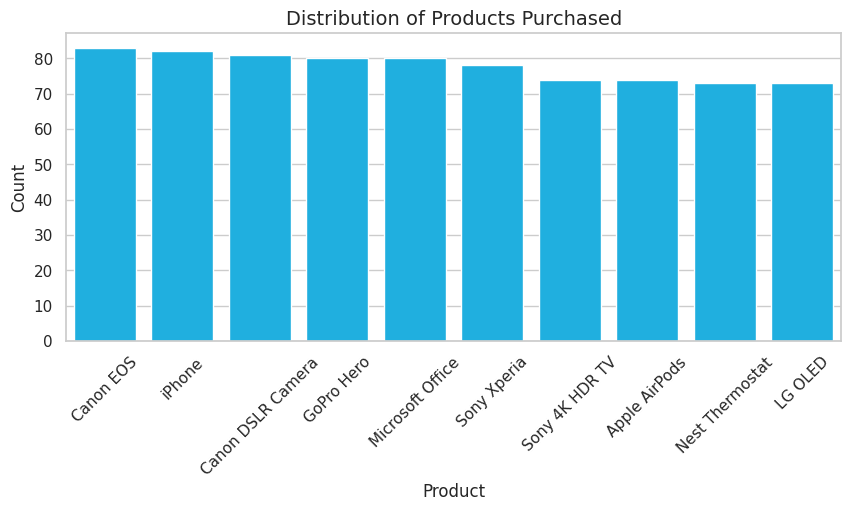

In [ ]:
# Distribution of product purchased
plt.figure(figsize=(10,4))
sns.countplot(data=df_model[df_model['product_purchased'].isin(top_products)], x='product_purchased', order=top_products, color='deepskyblue')
plt.title("Distribution of Products Purchased", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

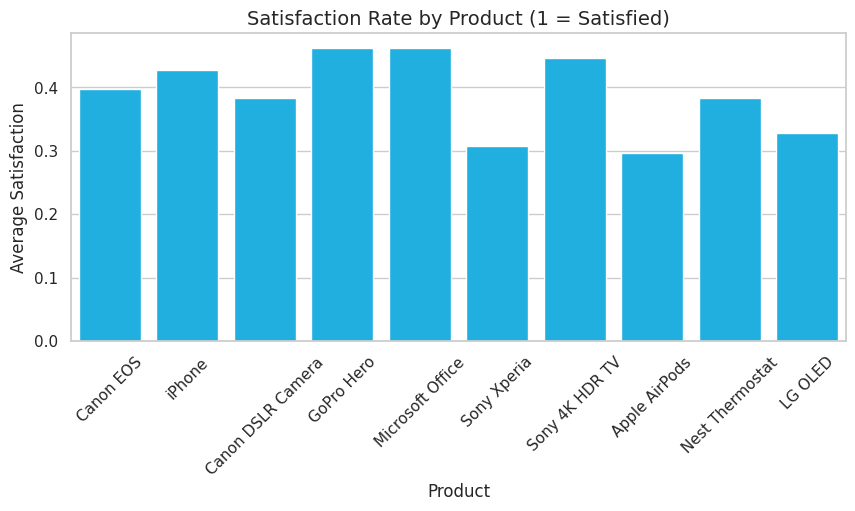

In [ ]:
# Satisfaction rate per product
plt.figure(figsize=(10,4))
sns.barplot(data=df_model[df_model['product_purchased'].isin(top_products)], x='product_purchased', y='satisfaction_binary', order=top_products, errorbar=None, color='deepskyblue')
plt.title("Satisfaction Rate by Product (1 = Satisfied)", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Average Satisfaction", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**INSIGHTS :**

Distribution:

- Most purchased products include Canon EOS, iPhone, DSLR, GoPro Hero, Microsoft Office.

Satisfaction:

- **GoPro Hero, Microsoft Office, Sony 4K HDR TV** show **higher satisfaction**.

- **Sony Xperia, LG OLED, Canon DSLR Camera** show **lower satisfaction**.

- Product purchased is a **useful predictor**, showing clear differences between items.

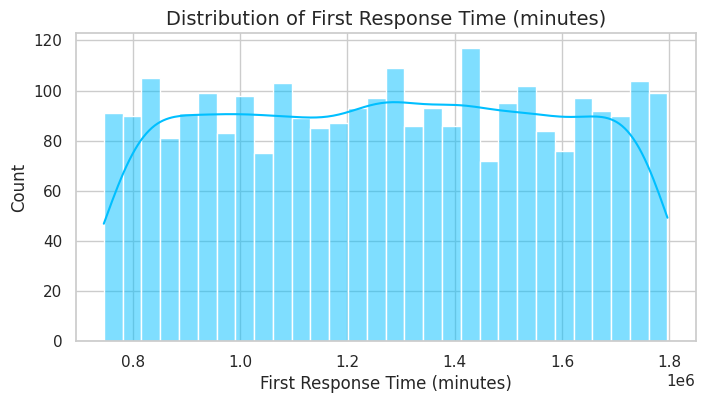

In [ ]:
# Distribution of First Response Time
plt.figure(figsize=(8,4))
sns.histplot(df_model['first_response_minutes'], bins=30, kde=True, color='deepskyblue')
plt.title("Distribution of First Response Time (minutes)", fontsize=14)
plt.xlabel("First Response Time (minutes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

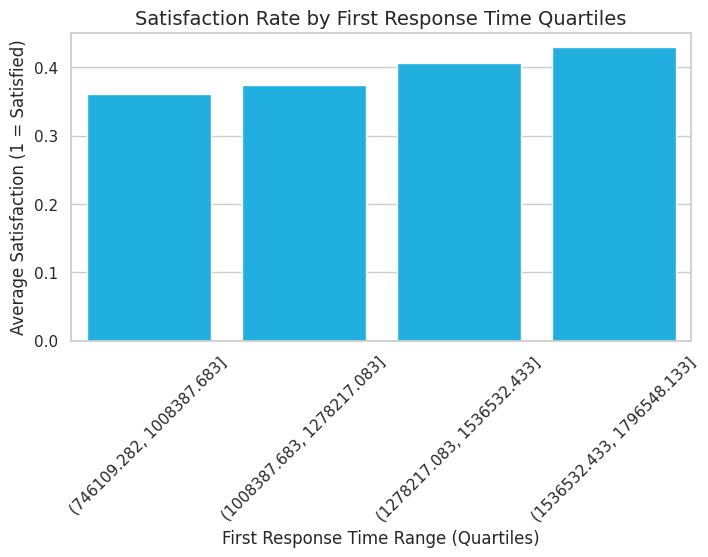

In [ ]:
# Relation Between First Response Time & Satisfaction
plt.figure(figsize=(8,4))
sns.barplot(data=df_model, x=pd.qcut(df_model['first_response_minutes'], 4, duplicates='drop'), y='satisfaction_binary', color='deepskyblue', errorbar=None)
plt.title("Satisfaction Rate by First Response Time Quartiles", fontsize=14)
plt.xlabel("First Response Time Range (Quartiles)", fontsize=12)
plt.ylabel("Average Satisfaction (1 = Satisfied)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**INSIGHTS :**

Distribution:

- Wide spread across values; one central spike around mid-range.

- Quartiles used because values are very large and varied.

Satisfaction vs First Response Time:

- Satisfaction **slightly increases** from lower quartiles to higher ones.

- Effect exists but is **weak** → small differences between quartiles.

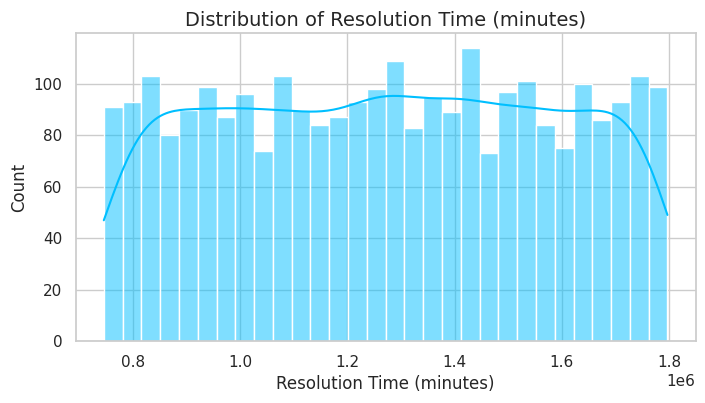

In [ ]:
# Distribution of Resolution Time
plt.figure(figsize=(8,4))
sns.histplot(df_model['resolution_minutes'], bins=30, kde=True, color='deepskyblue')
plt.title("Distribution of Resolution Time (minutes)", fontsize=14)
plt.xlabel("Resolution Time (minutes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

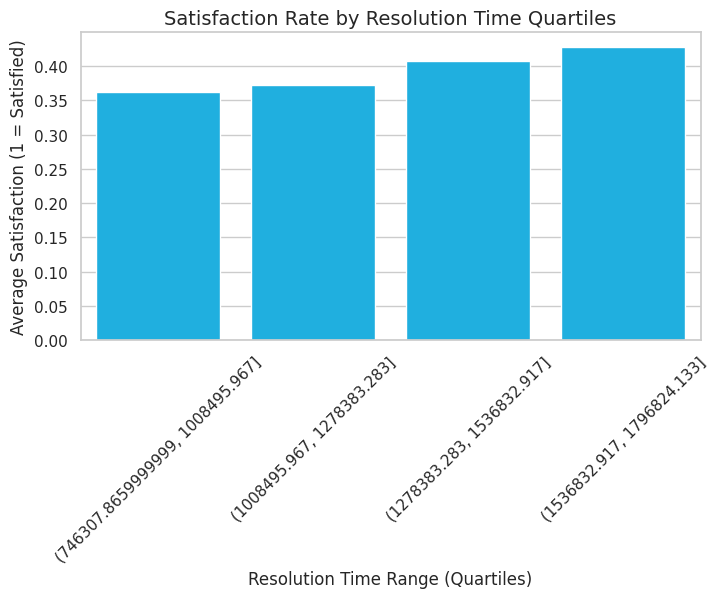

In [ ]:
# Relation Between Resolution Time & Satisfaction
plt.figure(figsize=(8,4))
sns.barplot(data=df_model, x=pd.qcut(df_model['resolution_minutes'], 4, duplicates='drop'), y='satisfaction_binary', color='deepskyblue', errorbar=None)
plt.title("Satisfaction Rate by Resolution Time Quartiles", fontsize=14)
plt.xlabel("Resolution Time Range (Quartiles)", fontsize=12)
plt.ylabel("Average Satisfaction (1 = Satisfied)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insights :**

Distribution:

- Uniformly spread across a large range, similar to first response time.

Satisfaction vs Resolution Time:

- Higher resolution times show **slightly higher satisfaction**.

- Lowest resolution times show the **lowest satisfaction**.

- The effect is present but **not strong**.

### **Correlation & Numeric Feature Analysis**

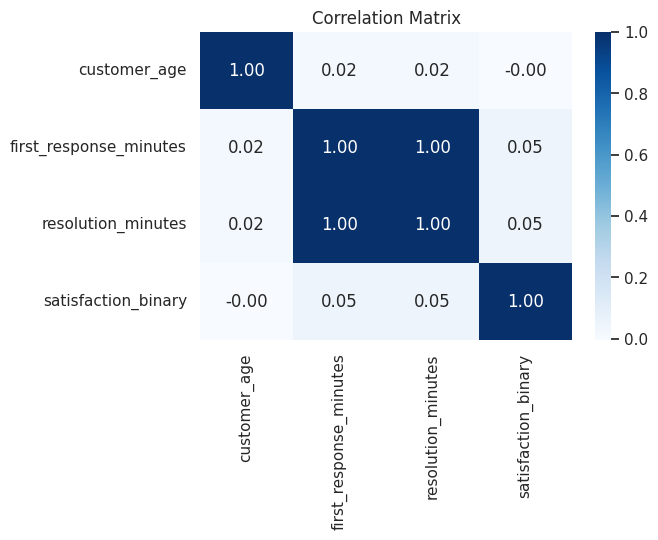

In [ ]:
# Correlation Heatmap (Numeric Features Only)
numeric_cols = ['customer_age','first_response_minutes','resolution_minutes','satisfaction_binary']

plt.figure(figsize=(6,4))
sns.heatmap(df_model[numeric_cols].corr(),annot=True,cmap='Blues',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

**Correlation Heatmap :**

- **Age has no relationship** with satisfaction (correlation ≈ 0).

- **First-response time and resolution time are highly correlated** with each other (≈ 0.97)

    → expected because longer response time usually means longer resolution time.

- **Both response times have very weak correlation** with satisfaction (≈ 0.04–0.05).

    → means time alone does **not strongly determine satisfaction**.

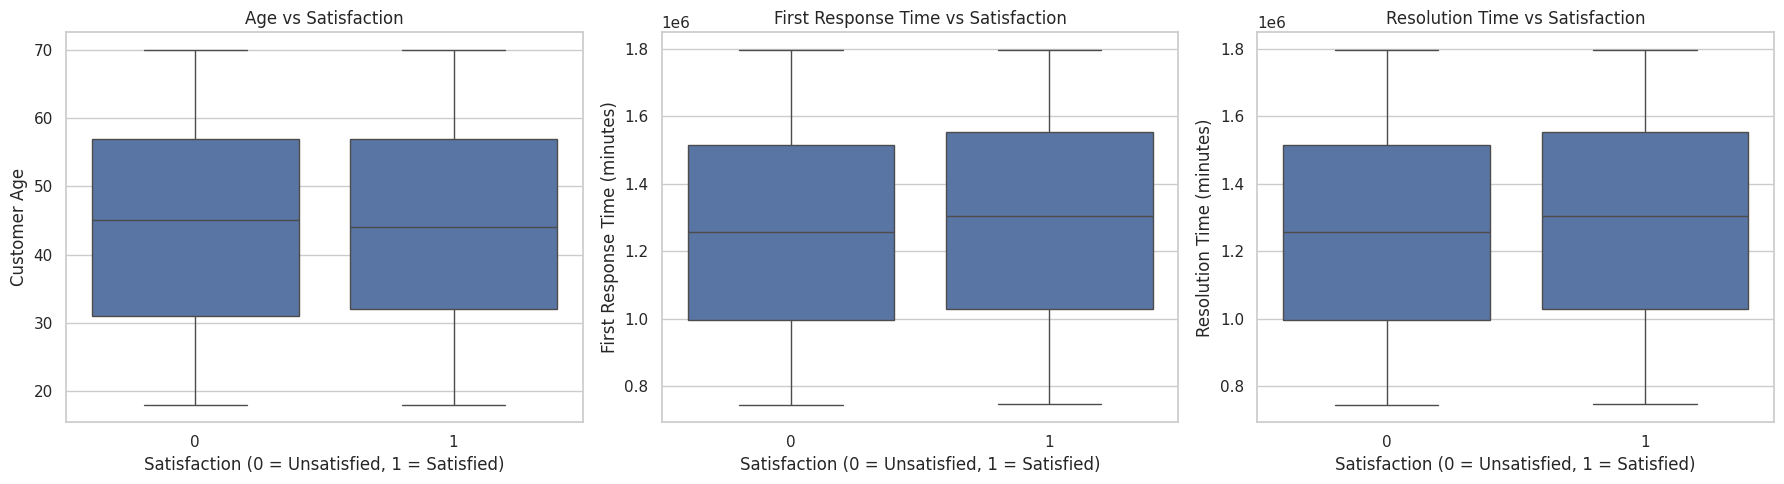

In [ ]:
# Boxplots: Numeric Features vs Satisfaction (1 row, 3 columns)

plt.figure(figsize=(18,5))          # One big figure for all 3 charts


# 1. Age vs Satisfaction
plt.subplot(1,3,1)
sns.boxplot(data=df_model, x='satisfaction_binary', y='customer_age')
plt.title("Age vs Satisfaction")
plt.xlabel("Satisfaction (0 = Unsatisfied, 1 = Satisfied)")
plt.ylabel("Customer Age")


# 2. First Response Time vs Satisfaction
plt.subplot(1,3,2)
sns.boxplot(data=df_model, x='satisfaction_binary', y='first_response_minutes')
plt.title("First Response Time vs Satisfaction")
plt.xlabel("Satisfaction (0 = Unsatisfied, 1 = Satisfied)")
plt.ylabel("First Response Time (minutes)")


# 3. Resolution Time vs Satisfaction
plt.subplot(1,3,3)
sns.boxplot(data=df_model, x='satisfaction_binary', y='resolution_minutes')
plt.title("Resolution Time vs Satisfaction")
plt.xlabel("Satisfaction (0 = Unsatisfied, 1 = Satisfied)")
plt.ylabel("Resolution Time (minutes)")

plt.tight_layout()     # Adjust spacing so plots don't overlap
plt.show()

**Boxplots - INSIGHTS :**

**a) Age vs Satisfaction**

- The age distribution is nearly identical for satisfied and unsatisfied customers.

- There is **no visible shift in median or spread** between groups.

    **Conclusion:** Age does **not** influence satisfaction.

**b) First Response Time vs Satisfaction**

- Satisfied customers have a **slightly higher** first-response time median.

- Fast responses do **not** guarantee satisfaction.

- Slight hint: customers with simple issues (solved quickly) may still give lower ratings.

    **Conclusion:** First-response time has **very small** effect on satisfaction.

**c) Resolution Time vs Satisfaction**

- Satisfied customers show a **slightly higher** resolution time median.

- Longer resolution time → slightly better satisfaction (in this dataset).

This likely means:

- Complex cases take longer but are solved with better quality.

- Customers care more about **quality of resolution** than speed.

    **Conclusion:** Resolution time impact is small but positive.

In [ ]:
df_model.to_csv("df_model.csv", index=False)
print("Dataset saved. Ready for Machine Learning Notebook.")

Dataset saved. Ready for Machine Learning Notebook.


### **Summary of Notebook 1 – Data Preparation & EDA**

- Cleaned raw dataset and handled missing values

- Converted time columns and created duration features

- Created a binary satisfaction target (Satisfied vs Unsatisfied)

- Removed rows without satisfaction labels

- Performed EDA on customer, ticket, product, and time-based features

- Identified useful predictors:

    - **Ticket Type, Ticket Priority, Ticket Channel, Product Purchased**

- Checked numeric correlations and distributions

- Final cleaned dataset saved as **df_model.csv**

The dataset is now ready for machine learning in **Notebook 2: Feature Encoding & Model Building**.